# Data Collection

In [ ]:
import pandas as pd
from pandas import json_normalize
import requests
import json
import time

apikey = "api key here"

weaponTypes = ["AK-47", "M4A4", "M4A1-S"]

AK47Finishes = [" Redline ", " Jaguar ", " Head Shot ", " Nightwish ", " Leet Museo ", " Legion of Anubis ", " Asiimov ", " Neon Rider ", " The Empress ", " Bloodsport ", " Neon Revolution ", " Fuel Injector ", " Aquamarine Revenge ", " Wasteland Rebel ", " Vulcan ", " Fire Serpent ", " Gold Arabesque ", " X-Ray ", " Wild Lotus ", " Ice Coaled ", " Phantom Disruptor ", " Point Disarray ", " Frontside Misty ", " Cartel ", " Case Hardened ", " Red Laminate ", " Panthera onca ", " Hydroponic ", " Jet Set ", " Slate ", " Rat Rod ", " Orbit Mk01 ", " Blue Laminate ", " Safety Net ", " First Class ", " Emerald Pinstripe ", " Uncharted ", " Elite Build ", " Steel Delta ", " Green Laminate ", " Black Laminate ", " Baroque Purple ", " Safari Mesh ", " Jungle Spray ", " Predator "]
M4A4Finishes = [" Howl ", " Temukau ", " In Living Color ", " The Emperor ", " Neo-Noir ", " Buzz Kill ", " The BattleStar ", " Royal Paladin ", " Bullet Rain ", " Desert-Strike ", " Asiimov ", " X-Ray ",  " Eye of Horus ",  " The Coalition ",  " Cyber Security ",  " Tooth Fairy ",  " Hellfire ",  " Desolate Space ",  " 龍王 (Dragon King) ",  " Poseidon ",  " Spider Lily ", " Evil Daimyo ", " Griffin ", " Zirka ", " Red DDPAT ", " Daybreak ", " Modern Hunter ", " Poly Mag ", " Magnesium ", " Faded Zebra ", " Global Offensive ", " Converter ", " Radiation Hazard ", " Dark Blossom ", " Mainframe ", " Urban DDPAT ", " Desert Storm ", " Tornado ", " Jungle Tiger "]
M4A1Finishes = [" Printstream ", " Player Two ", " Mecha Industries ", " Chantico's Fire ", " Golden Coil ", " Hyper Beast ", " Cyrex ", " Imminent Danger ", " Welcome to the Jungle ", " Nightmare ", " Leaded Glass ", " Decimator ", " Atomic Alloy ", " Guardian ", " Blue Phosphor ", " Control Panel ", " Hot Rod ", " Master Piece ", " Knight ", " Emphorosaur-S ", " Night Terror ", " Flashback ", " Basilisk ", " Bright Water ", " Dark Water ", " Icarus Fell ", " Nitro ", " Briefing ", " Blood Tiger ", " Fizzy POP ", " VariCamo ", " Mud-Spec ", " Moss Quartz ", " Boreal Forest "]

skinWears = ["(Factory New)", "(Minimal Wear)", "(Field-Tested)", "(Well-Worn)", "(Battle-Scarred)"]

toRemove = ["nameID", "appID", "market_hash_name", "description", "url", "image", "border_color", "app_context_data", "updated_at", "histogram"]

df = pd.DataFrame()

for l in weaponTypes:
  skinFinishes = []
  if l == "AK-47":  skinFinishes = AK47Finishes
  if l == "M4A4":  skinFinishes = M4A4Finishes
  if l == "M4A1-S":  skinFinishes = M4A1Finishes
  for i in skinFinishes:
    time.sleep(10)
    for j in skinWears:
      call = requests.get("https://api.steamapis.com/market/item/730/" + l + " |" + i + j + "?api_key=" + apikey)
      call = call.json()
      for k in toRemove:
        call.pop(k, None)
      call = json_normalize(call)
      df = pd.concat([df,call])


# Data Cleaning

In [150]:
collection_release_year_map = {
    'The Anubis Collection': 2023, 'The Revolution Collection': 2023, 'The Recoil Collection': 2022, 'The Dreams & Nightmares Collection': 2022, 'The 2021 Train Collection': 2021, 'The 2021 Dust 2 Collection': 2021,
    'The 2021 Mirage Collection': 2021, 'The 2021 Vertigo Collection': 2021, 'The Operation Riptide Collection': 2021, 'The Snakebite Collection': 2021, 'The Operation Broken Fang Collection': 2020, 'The Control Collection': 2020,
    'The Ancient Collection': 2020, 'The Havoc Collection': 2020, 'The Fracture Collection': 2020, 'The Prisma 2 Collection': 2020, 'The Canals Collection': 2019, 'The St. Marc Collection': 2019,
    'The Norse Collection': 2019, 'The Shattered Web Collection': 2019, 'The CS20 Collection': 2019, 'The X-Ray Collection': 2019, 'The Prisma Collection': 2019, 'The Clutch Collection': 2018,
    'The Blacksite Collection': 2018, 'The Danger Zone Collection': 2018, 'The 2018 Nuke Collection': 2018, 'The 2018 Inferno Collection': 2018, 'The Horizon Collection': 2018, 'The Spectrum 2 Collection': 2017,
    'The Operation Hydra Collection': 2017, 'The Spectrum Collection': 2017, 'The Glove Collection': 2016, 'The Gamma 2 Collection': 2016, 'The Gamma Collection': 2016, 'The Chroma 3 Collection': 2016,
    'The Wildfire Collection': 2016, 'The Revolver Case Collection': 2015, 'The Shadow Collection': 2015, 'The Rising Sun Collection': 2015, 'The Gods and Monsters Collection': 2015, 'The Chop Shop Collection': 2015,
    'The Falchion Collection': 2015, 'The Chroma 2 Collection': 2015, 'The Chroma Collection': 2015, 'The Vanguard Collection': 2014, 'The Cache Collection': 2014, 'The eSports 2014 Summer Collection': 2014,
    'The Breakout Collection': 2014, 'The Baggage Collection': 2014, 'The Overpass Collection': 2014, 'The Cobblestone Collection': 2014, 'The Bank Collection': 2014, 'The Huntsman Collection': 2014,
    'The Phoenix Collection': 2014, 'The Arms Deal 3 Collection': 2014, 'The eSports 2013 Winter Collection': 2013, 'The Winter Offensive Collection': 2013, 'The Italy Collection': 2013, 'The Mirage Collection': 2013,
    'The Safehouse Collection': 2013, 'The Dust 2 Collection': 2013, 'The Lake Collection': 2013, 'The Train Collection': 2013, 'The Arms Deal 2 Collection': 2013, 'The Alpha Collection': 2013,
    'The Bravo Collection': 2013, 'The Assault Collection': 2013, 'The Dust Collection': 2013, 'The Office Collection': 2013, 'The Nuke Collection': 2013, 'The Aztec Collection': 2013,
    'The Inferno Collection': 2013, 'The Arms Deal Collection': 2013, 'The Militia Collection': 2013, 'The Vertigo Collection': 2013, 'The eSports 2013 Collection': 2013
}

def findCollectionTitle(x):
  x = x.split("'")
  for i in x:
    if i[:3] == 'The':
      return i

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

def isolatePrices(x):
  x = x.split(',')
  priceList = []
  for i in x:
    if isfloat(i):
      priceList.append(float(i))
  return priceList

def getAveragePrice(x):
  sum=0
  for i in x:
    sum = sum + i
  return round(sum/len(x), 2)

In [151]:
import pandas as pd
pd.options.mode.chained_assignment = None

df=pd.read_csv('skins.csv')

df.rename(columns={'assets.type':'rarity'}, inplace=True)
df.rename(columns={'assets.descriptions':'collection'}, inplace=True)

df['collection'] = df['collection'].apply(findCollectionTitle)

prices = df['median_avg_prices_15days'].apply(isolatePrices)

df['average_price'] = prices.apply(getAveragePrice)

skin_name = df['market_name'].apply(lambda x: x.split('(')[0])

df['weapon'] = skin_name.apply(lambda x: x.split('|')[0].strip())

df['last_sold_on_market'] = df['median_avg_prices_15days'].apply(lambda x: x.split("'")[1][-4:])

df = df[df.last_sold_on_market == '2023']

df['skin_condition'] = df['market_name'].apply(lambda x: x.split('(')[1].replace(')', ''))

df['skin_name'] = skin_name.apply(lambda x: x.split('|')[1].strip())

df['release_year'] = df['collection'].map(collection_release_year_map).fillna(0)

df['rarity'] = df['rarity'].apply(lambda x: x.split(' ')[0].strip())


df.to_csv('skins_eda.csv', index=False)

# Exploratory Data Analysis

## Release year histogram. The number of skins released per year has trended down consistently since 2013.

<AxesSubplot:xlabel='release_year', ylabel='Count'>

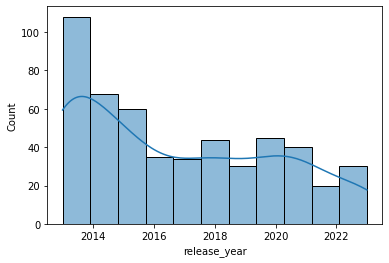

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df.release_year, kde=True)

## Average price histogram. The majority of skins are under 250 dollars with a large number of them being under 20 dollars.

<AxesSubplot:xlabel='average_price', ylabel='Count'>

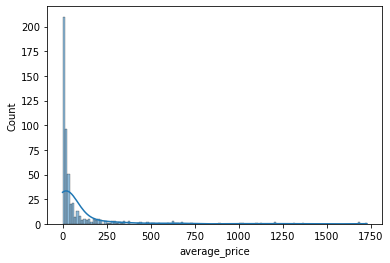

In [153]:
sns.histplot(df.average_price, kde=True)

## Release year boxplot. Since every skin has been released between 2013 and 2023 it wouldn't make sense for there to be outliers.

<AxesSubplot:xlabel='release_year'>

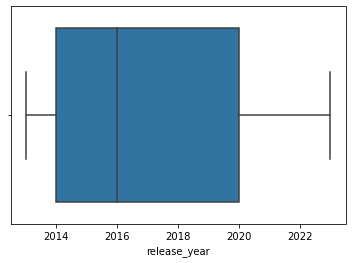

In [154]:
sns.boxplot(x=df.release_year)

## Average price boxplot. There are many outliers as the price of skins varies so widely.

<AxesSubplot:xlabel='average_price'>

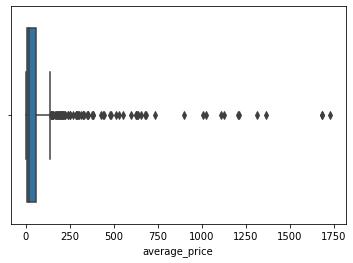

In [155]:
sns.boxplot(x=df.average_price)

## Correlation heatmap.
### It seems that the average price for a weapon skin is not much correlated with its release year.

<AxesSubplot:>

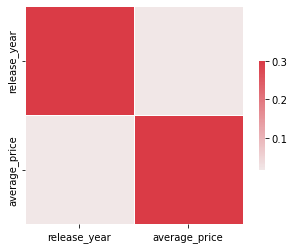

In [156]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['release_year', 'average_price']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

## The count of rarity, weapon, and skin_condition. The reason that the skin_conditions counts aren't all the same is due to weapon floats. Not every weapon skin exists in every condition.

### Weapon Type

<AxesSubplot:xlabel='weapon', ylabel='count'>

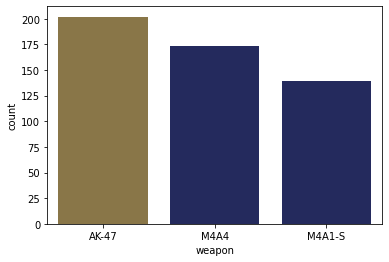

In [157]:
weapon_palette = ['#947a3d', '#1b2366', '#1b2366']

sns.countplot(x=df['weapon'], palette=weapon_palette)

### Skin Rarity

<AxesSubplot:xlabel='rarity', ylabel='count'>

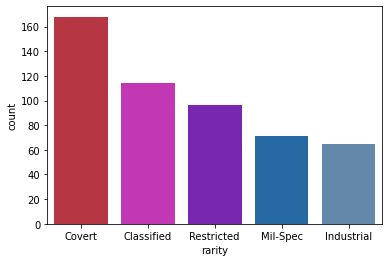

In [158]:
df_cat = df[['rarity', 'weapon', 'skin_condition']]

order_rarity = ['Covert', 'Classified', 'Restricted', 'Mil-Spec', 'Industrial']
order_condition = ['Factory New', 'Minimal Wear', 'Field-Tested', 'Well-Worn', 'Battle-Scarred']
palette = ['#cc2132', '#d921c6', '#7b10c7', '#116ab8', '#5789b5']

sns.countplot(x=df['rarity'], order=order_rarity, palette=palette)



### Skin Condition

<AxesSubplot:xlabel='skin_condition', ylabel='count'>

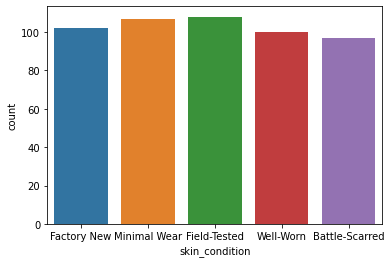

In [159]:
sns.countplot(x=df['skin_condition'], order=order_condition)

## The average price of rarity, weapon, skin_condition, and release year.

### Weapon Type

,weapon,average_price
0,AK-47,107.37
1,M4A1-S,81.38
2,M4A4,79.90


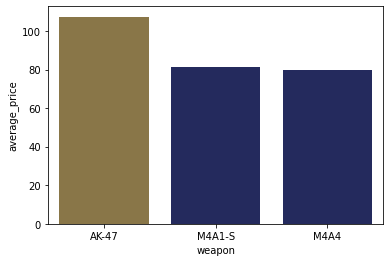

In [160]:
df_price_per_weapon = df.groupby('weapon')['average_price'].mean().apply(lambda x: round(x, 2))
df_price_per_weapon = df_price_per_weapon.to_frame().reset_index()

sns.barplot(x=df_price_per_weapon.weapon, y=df_price_per_weapon.average_price, palette=weapon_palette)
df_price_per_weapon.head()

### Skin Rarity

<AxesSubplot:xlabel='rarity', ylabel='average_price'>

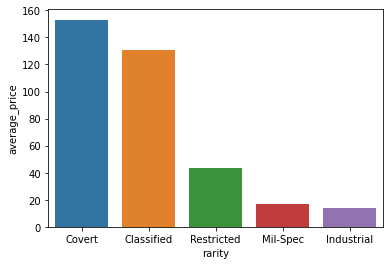

In [161]:
df_price_per_rarity = df.groupby('rarity')['average_price'].mean().apply(lambda x: round(x, 2))
df_price_per_rarity = df_price_per_rarity.to_frame().reset_index()

sns.barplot(x=df_price_per_rarity.rarity, y=df_price_per_rarity.average_price, order=order_rarity)

### Skin Condition

<AxesSubplot:xlabel='skin_condition', ylabel='average_price'>

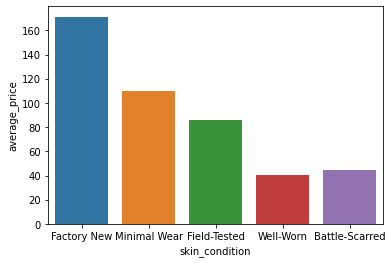

In [162]:
df_price_per_condition = df.groupby('skin_condition')['average_price'].mean().apply(lambda x: round(x, 2))
df_price_per_condition = df_price_per_condition.to_frame().reset_index()


sns.barplot(x=df_price_per_condition.skin_condition, y=df_price_per_condition.average_price, order=order_condition)

### Release Year

<AxesSubplot:xlabel='release_year', ylabel='average_price'>

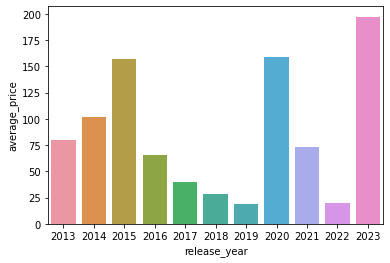

In [163]:
df_price_per_condition = df.groupby('release_year')['average_price'].mean().apply(lambda x: round(x, 2))
df_price_per_condition = df_price_per_condition.to_frame().reset_index()


sns.barplot(x=df_price_per_condition.release_year, y=df_price_per_condition.average_price)

## The average price of a skin on each weapon at each rarity

<AxesSubplot:xlabel='weapon', ylabel='average_price'>

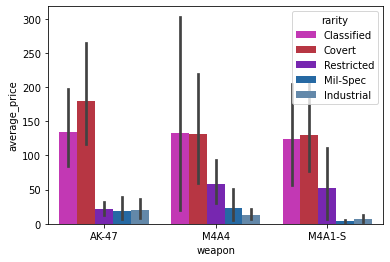

In [164]:
palette = ['#d921c6', '#cc2132', '#7b10c7', '#116ab8', '#5789b5']

sns.barplot(x='weapon', y='average_price', hue='rarity', data=df, palette=palette)


## The average price of a skin on each weapon at each condition

<AxesSubplot:xlabel='weapon', ylabel='average_price'>

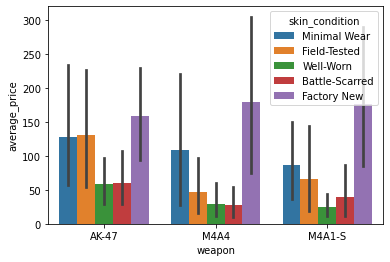

In [165]:
sns.barplot(x='weapon', y='average_price', hue='skin_condition', data=df)

## The average price of a skin on each weapon at each release year

                     average_price
weapon release_year               
AK-47  2013                 176.46
       2014                 151.59
       2015                  70.70
       2016                 162.30
       2017                  65.55
       2018                  58.06
       2019                   4.80
       2020                 198.02
       2021                  20.64
       2022                  39.10
       2023                  59.09
M4A1-S 2013                  16.38
       2014                  84.30
       2015                 245.31
       2016                  33.64
       2017                  11.22
       2018                  28.67
       2019                  19.94
       2020                 277.51
       2021                 225.48
       2022                   1.67
       2023                   1.90
M4A4   2013                  37.87
       2014                  16.79
       2015                 208.38
       2016                  16.16
       2017         

<AxesSubplot:xlabel='weapon', ylabel='average_price'>

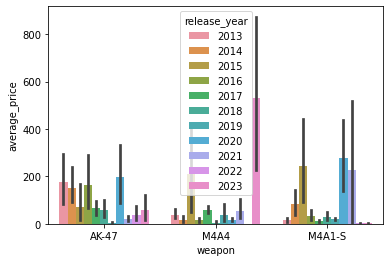

In [166]:
print(round(pd.pivot_table(df, index = ['weapon', 'release_year'], values = 'average_price'), 2))

sns.barplot(x='weapon', y='average_price', hue='release_year', data=df)

In [167]:
round(pd.pivot_table(df, index = ['weapon', 'rarity', 'skin_condition'], values = 'average_price'), 2)



average_price
weapon rarity     skin_condition               
AK-47  Classified Battle-Scarred          66.57
                  Factory New            187.40
                  Field-Tested           198.60
                  Minimal Wear           144.54
                  Well-Worn               78.16
...                                         ...
M4A4   Restricted Battle-Scarred          41.52
                  Factory New             90.72
                  Field-Tested            61.01
                  Minimal Wear            74.08
                  Well-Worn               20.32

[75 rows x 1 columns]

# Model Building

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

df=pd.read_csv('skins_eda.csv')

df_model = df[['rarity', 'average_price', 'weapon', 'skin_condition', 'release_year']]

df_dum = pd.get_dummies(df_model)

X = df_dum.drop('average_price', axis=1)
y = df_dum.average_price.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

## Linear Regression Model

### We can see that our linear regression model is very inaccurate, being off by about 110 dollars when predicting the average price of a weapon skin. Since the prices of skins are so varied it is very difficult to create a model which can accurately predict the price of a skin given some parameters.

In [169]:
from sklearn.linear_model import LinearRegression
import numpy as np

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error'))

-109.65685702247576

## Random Forest Model

### The random forest model is better than the linear regression model but not by much

In [170]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error'))

-94.03395160684127

## Tune Models With GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,20), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_

## Use Models to Predict the Test Set and See How They Perform

In [ ]:
from sklearn.metrics import mean_absolute_error

pred_lm = lm.predict(X_test)
pred_rf = gs.best_estimator_.predict(X_test)

print(mean_absolute_error(y_test, pred_lm))
print(mean_absolute_error(y_test, pred_rf))